# The Godfather returns

## Introduction

The Godfather returns is a multi-class classification data set formatted in the AutoML format.

In [1]:
codedir = 'sample_code/'                        # Change this to the directory where you put the code
from sys import path; path.append(codedir)
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

## Fetch the data and load it

In [2]:
datadir = 'public_data/'                        # Change this to the directory where you put the input data
dataname = 'crime'
basename = datadir  + dataname
!ls $basename*

public_data/crime_feat.name   public_data/crime_train.data
public_data/crime_label.name  public_data/crime_train.solution
public_data/crime_test.data   public_data/crime_valid.data


In [3]:
import data_io
from imp import reload
reload(data_io)
data = data_io.read_as_df(basename)                          # The data are loaded as a Pandas Data Frame
#data.to_csv(basename + '_train.csv', index=False)           # This allows saving the data in csv format

Reading public_data/crime_train from AutoML format
Number of examples = 60916
Number of features = 11
Number of classes = 6


In [4]:
data.head()

,Year,Month,Day,DayOfWeek,Minute,Hour,X,Y,PdDistrict,Address,Resolution,target
0,4.0,12.0,30.0,6.0,0.0,21.0,-0.800143,0.016993,1.0,0.0,0.0,LARCENY/THEFT
1,5.0,5.0,31.0,5.0,15.0,12.0,-1.301228,0.005119,4.0,0.0,1.0,VEHICLE THEFT
2,11.0,6.0,11.0,2.0,0.0,13.0,0.234014,0.012017,6.0,1.0,0.0,DRUG/NARCOTIC
3,11.0,8.0,4.0,0.0,15.0,18.0,0.221519,0.015796,6.0,1.0,1.0,LARCENY/THEFT
4,6.0,5.0,30.0,5.0,30.0,13.0,1.099286,0.026409,8.0,1.0,1.0,LARCENY/THEFT


In [5]:
data.describe() 

,Year,Month,Day,DayOfWeek,Minute,Hour,X,Y,PdDistrict,Address,Resolution
count,60916.000000,60916.000000,60916.000000,60916.000000,60916.000000,60916.000000,60916.000000,60916.000000,60916.000000,60916.000000,60916.000000
mean,5.616324,6.450489,15.688817,2.986719,18.902899,14.197354,0.003073,0.007797,5.004777,0.330603,1.179444
std,3.687726,3.444225,8.729051,1.958757,18.405154,6.231125,1.139663,1.355121,3.089689,0.470434,1.773405
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-3.001771,-0.133434,0.000000,0.000000,0.000000
25%,2.000000,3.000000,8.000000,1.000000,0.000000,10.000000,-0.315743,-0.033782,2.000000,0.000000,0.000000
50%,6.000000,6.000000,16.000000,3.000000,15.000000,15.000000,0.197800,0.004316,5.000000,0.000000,1.000000
75%,9.000000,10.000000,23.000000,5.000000,30.000000,19.000000,0.491827,0.022567,8.000000,1.000000,1.000000
max,12.000000,12.000000,31.000000,6.000000,59.000000,23.000000,63.138036,105.699962,9.000000,1.000000,16.000000


In [6]:
categories = data.groupby('target')

In [7]:
numbers = []
cat_names = []
for gp in categories.groups:
    cat_names.append(gp)
    nb =  len(categories.get_group(gp))
    numbers.append(nb)

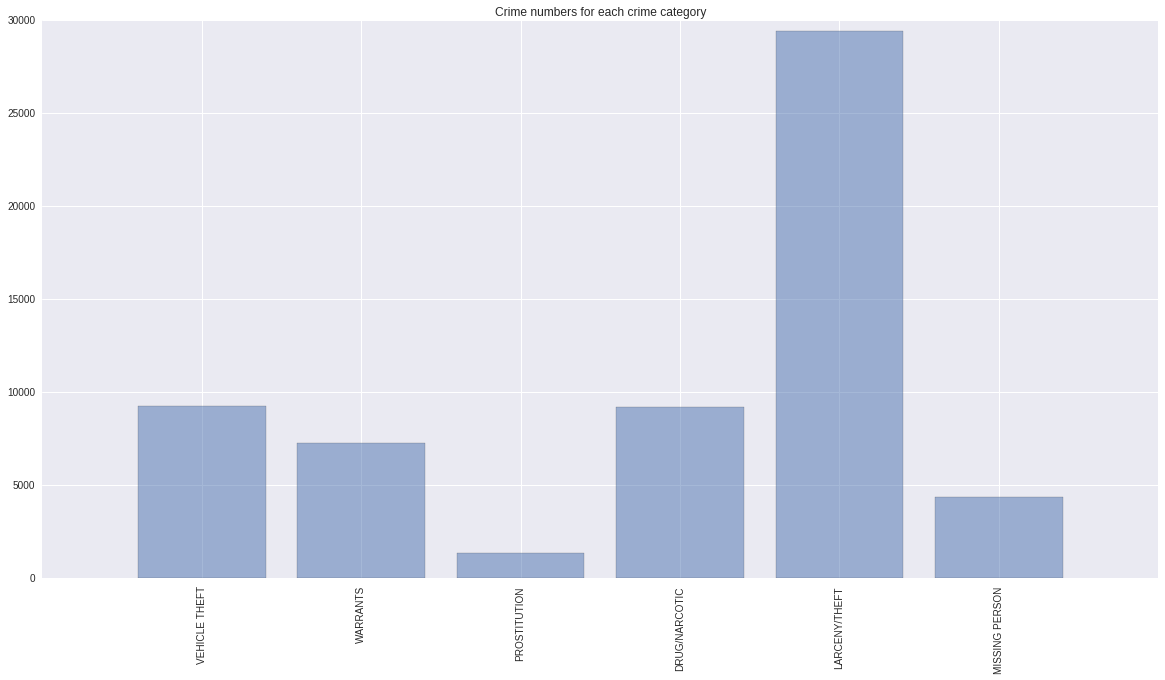

In [8]:
import numpy as np
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(numbers)), numbers,align="center",alpha=.5)
plt.title('Crime numbers for each crime category')
plt.xticks(range(len(numbers)), cat_names,rotation=90,fontsize=10)
plt.show()

In [9]:
print (cat_names)

['VEHICLE THEFT', 'WARRANTS', 'PROSTITUTION', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'MISSING PERSON']


In [10]:
years = data.groupby('Year')
months = data.groupby('Month')
days = data.groupby('Day')
weeks = data.groupby('DayOfWeek')
hours = data.groupby('Hour')

In [11]:
year = []
num_year = []
month = []
num_months = []
day =  []
num_days = []
week = []
num_weeks  = []
hour = []
num_hours = []
for gr in years.groups:
    year.append(int(gr)+2000)
    num_year.append(len(years.get_group(gr)))
for gr in months.groups:
    month.append(gr)
    num_months.append(len(months.get_group(gr)))
for gr in days.groups:
    day.append(gr)
    num_days.append(len(days.get_group(gr)))
for gr in weeks.groups:
    week.append(gr)
    num_weeks.append(len(weeks.get_group(gr)))
for gr in hours.groups:
    hour.append(int(gr)+2000)
    num_hours.append(len(hours.get_group(gr)))

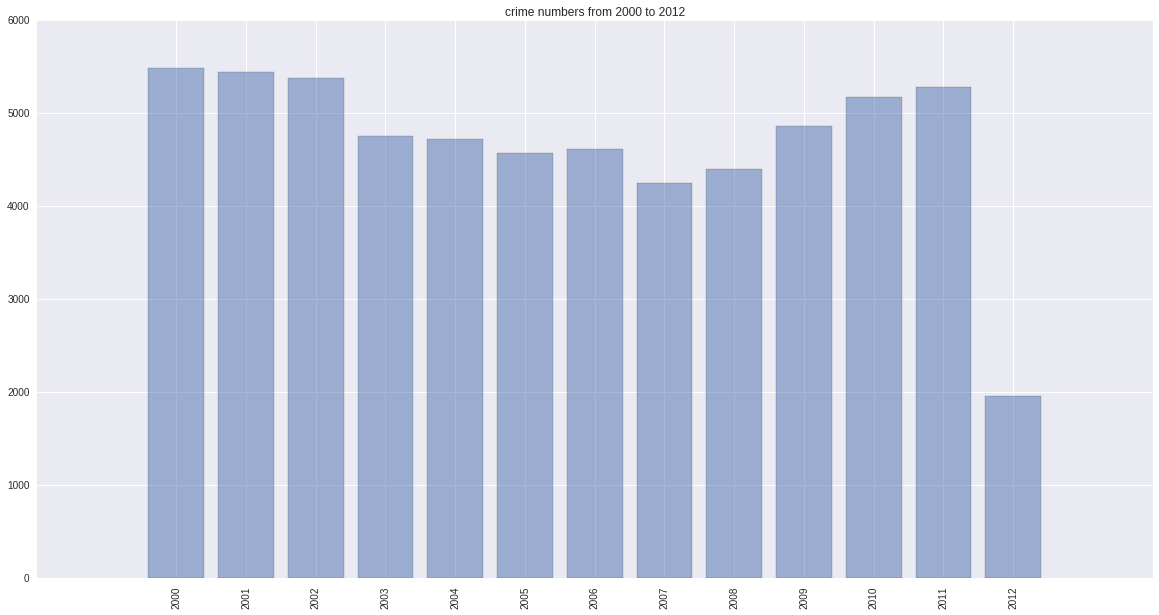

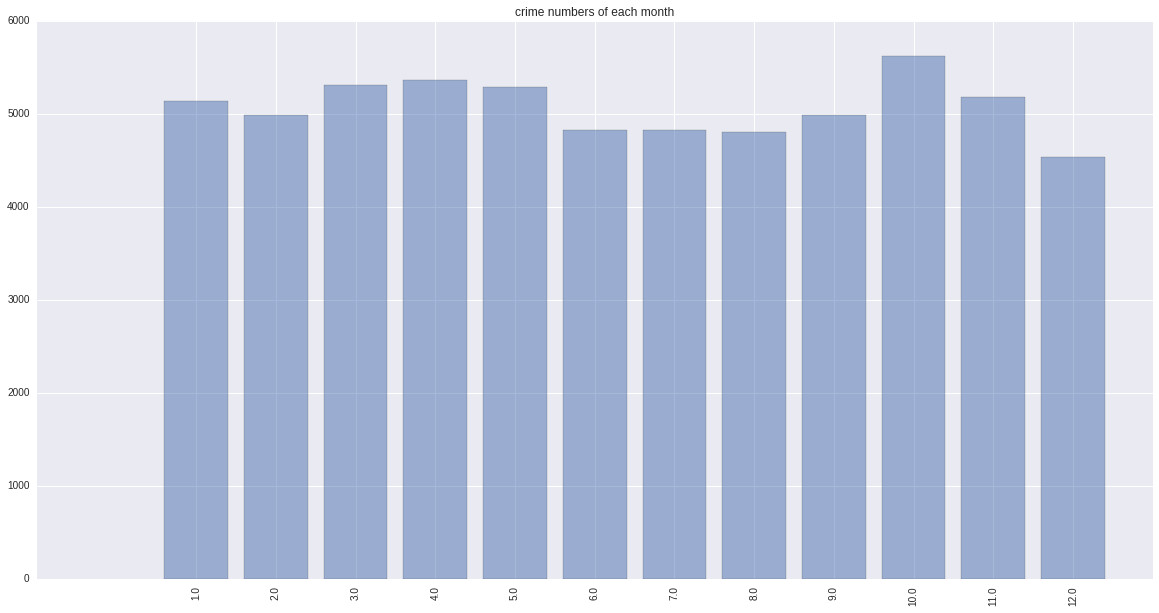

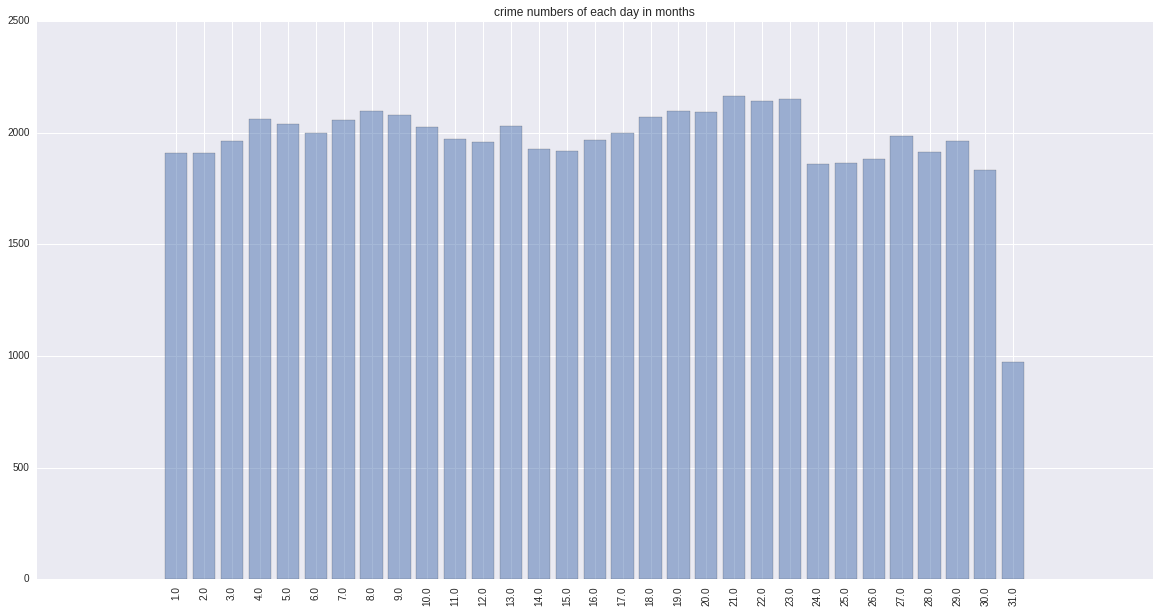

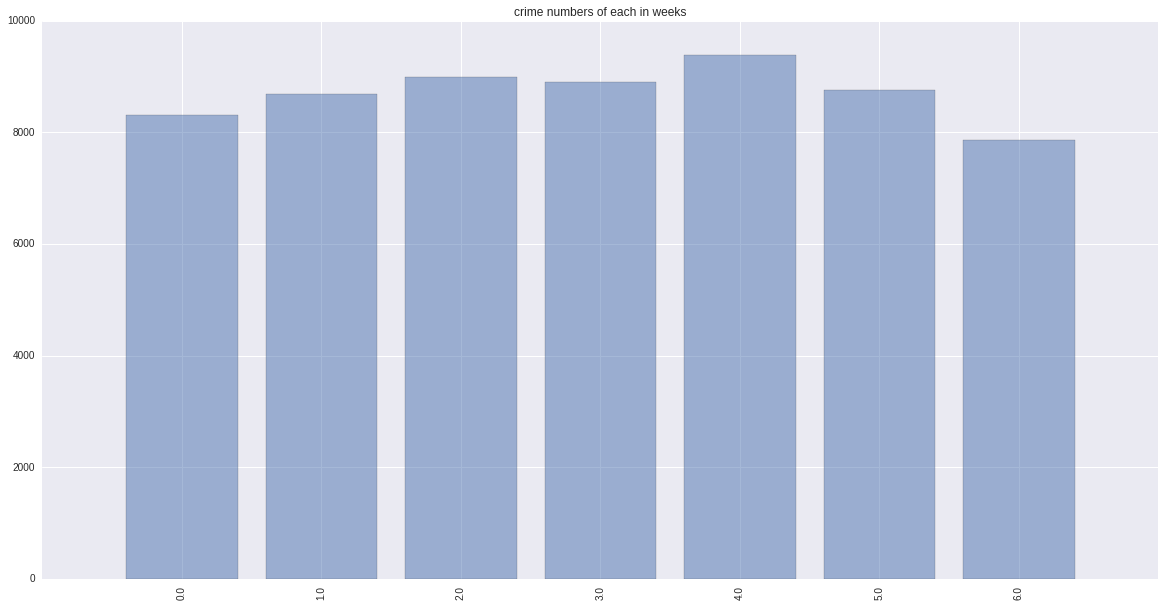

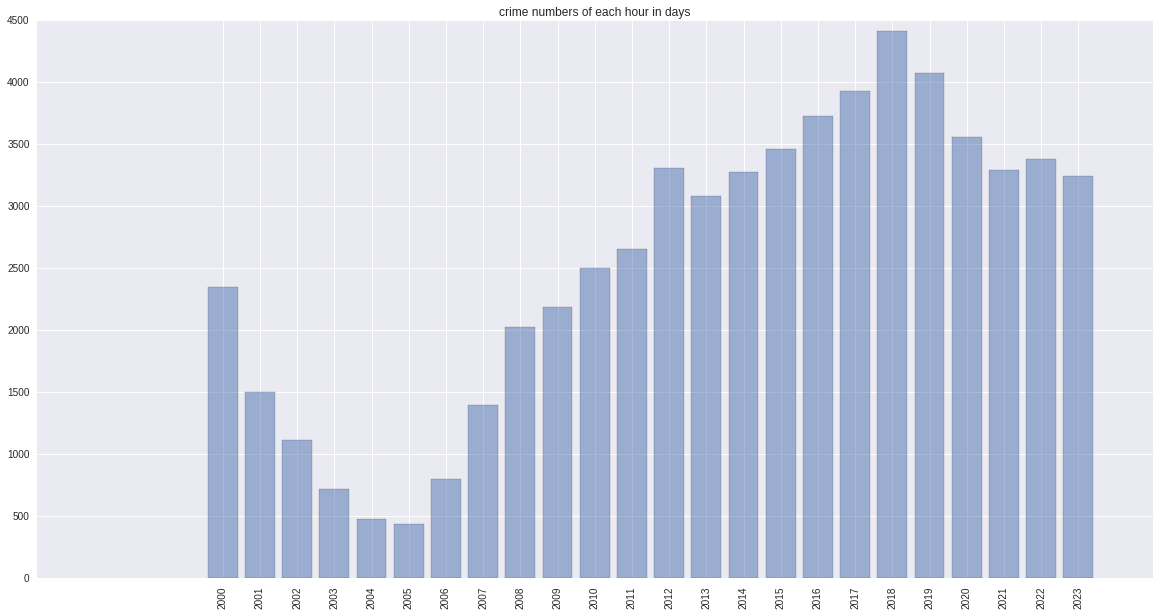

In [12]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(num_year)), num_year,align="center",alpha=.5)
plt.title('crime numbers from 2000 to 2012')
plt.xticks(range(len(num_year)), year,rotation=90,fontsize=10)
plt.show()

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(num_months)), num_months,align="center",alpha=.5)
plt.title('crime numbers of each month')
plt.xticks(range(len(num_months)), month, rotation=90,fontsize=10)
plt.show()

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(num_days)), num_days,align="center",alpha=.5)
plt.title('crime numbers of each day in months')
plt.xticks(range(len(num_days)), day, rotation=90,fontsize=10)
plt.show()

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(num_weeks)), num_weeks,align="center",alpha=.5)
plt.title('crime numbers of each in weeks')
plt.xticks(range(len(num_weeks)), week,rotation=90,fontsize=10)
plt.show()

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(num_hours)), num_hours,align="center",alpha=.5)
plt.title('crime numbers of each hour in days')
plt.xticks(range(len(num_hours)), hour,rotation=90,fontsize=10)
plt.show()

## Building a predictive model

Data matrices for training and making predictions.

In [13]:
X_train = data.drop('target', axis=1).values            # This is the data matrix you already loaded (training data)
y_train = data['target'].values                         # These are the target values encoded as categorical variables
print ('Dimensions X_train=', X_train.shape, 'y_train=', y_train.shape)
X_valid = data_io.read_as_df(basename, 'valid').values
X_test = data_io.read_as_df(basename, 'test').values

('Dimensions X_train=', (60916, 11), 'y_train=', (60916,))
Reading public_data/crime_valid from AutoML format
Number of examples = 3583
Number of features = 11
Reading public_data/crime_test from AutoML format
Number of examples = 7168
Number of features = 11


The initial classifier in your starting kit (in the sample_code directory).

In [14]:
import classifier
reload(classifier)                               # If you make changes to your code you have to reload it
from classifier import Classifier
Classifier??

Train, run, and save your classifier and your predictions. If you saved a trained model and/or prediction results, the evaluation script will look for those and use those in priority [(1) use saved predictions; (2) if no predictions, use saved model, do not retrain, just test; (3) if neither, train and test model from scratch]. Compute the predictions with predict_proba, this is more versatile.

In [15]:
result_dir = 'res/'
outname = result_dir + dataname
clf = Classifier()
clf.fit(X_train, y_train)

In [16]:
Y_valid = clf.predict_proba(X_valid) 
Y_test = clf.predict_proba(X_test) 
clf.save(outname)
#clf.load(outname) # Uncomment to check reloading works
data_io.write(outname + '_valid.predict', Y_valid)
data_io.write(outname + '_test.predict', Y_test)
!ls $outname*

res/crime_model.pickle	res/crime_test.predict	res/crime_valid.predict


Compute the training accuracy.

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Directly predicts the (categorical) class labels
y_predict = clf.predict(X_train)                   
print ('Training accuracy = ', accuracy_score(y_train, y_predict))
class_labels = clf.get_classes()     
print ('Class labels=', class_labels)
print ('Confusion matrix [known in lines, predicted in columns]=\n',confusion_matrix(y_train, y_predict, class_labels))

('Training accuracy = ', 0.99236653752708648)
('Class labels=', array(['DRUG/NARCOTIC', 'LARCENY/THEFT', 'MISSING PERSON', 'PROSTITUTION',
       'VEHICLE THEFT', 'WARRANTS'], dtype=object))
('Confusion matrix [known in lines, predicted in columns]=\n', array([[ 9191,     0,     0,     1,     1,     3],
       [   21, 29432,     0,     0,     0,     0],
       [    4,     0,  4376,     0,     0,     0],
       [    2,     0,     1,  1343,     0,     0],
       [    1,    14,     1,     0,  9254,     0],
       [  305,    78,    11,    14,     8,  6855]]))


Compute cross-validation accuracy. This is usually worse than the training accuracy. Notice that we internally split the training data into training and validation set (this is because we do NOT have the labels of X_valid and X_test).

In [18]:
from sklearn.cross_validation import StratifiedShuffleSplit
# This is just an example of 2-fold cross-validation
skf = StratifiedShuffleSplit(y_train, n_iter=2, test_size=0.5, random_state=61)
i=0
for idx_t, idx_v in skf:
    i=i+1
    Xtr = X_train[idx_t]
    Ytr = y_train[idx_t]
    Xva = X_train[idx_v]
    Yva = y_train[idx_v]
    clf = Classifier()
    clf.fit(Xtr, Ytr)
    Y_predict = clf.predict(Xva)
    print ('Fold', i, 'validation accuracy = ', accuracy_score(Y_predict, Yva))

('Fold', 1, 'validation accuracy = ', 0.60351960076170463)
('Fold', 2, 'validation accuracy = ', 0.60296145511852384)


In [19]:
from sklearn.metrics import classification_report  
print(classification_report(Yva, Y_predict, target_names=class_labels))

                precision    recall  f1-score   support

 DRUG/NARCOTIC       0.53      0.54      0.53      4598
 LARCENY/THEFT       0.74      0.72      0.73     14727
MISSING PERSON       0.65      0.68      0.67      2190
  PROSTITUTION       0.69      0.73      0.71       673
 VEHICLE THEFT       0.37      0.40      0.38      4635
      WARRANTS       0.42      0.40      0.41      3635

   avg / total       0.61      0.60      0.60     30458



ADVANCED: Sklearn does not have multi-class metrics, this shows how libscore metrics work.

In [20]:
import libscores
 
# To evaluate results with multi-class metrics, the targets must be encoded as one vs. the rest
Y_train, C = libscores.onehot(y_train)                                   
print ('Dimensions Y_train=', Y_train.shape, 'Class labels=', C)
#assert((class_labels==C).all()) # Just to make sure the labels of the classifier are in the right order
# Note: if all went well, you should recover public_data/iris_train.solution
# You had it all along, but to show you some nice plots we loaded the data as a data frame so we lost it!

from libscores import bac_metric 
from libscores import pac_metric 
from libscores import log_loss
# Predicts probabilities, a matrix patnum x classnum 
# As solution, you must use Y_train, not y_train
y_predict_proba = clf.predict_proba(X_train)      
print ('Training balanced accuracy = ', bac_metric(Y_train, y_predict_proba, task='multiclass.classification'))
print ('Training probabilistic accuracy = ', pac_metric(Y_train, y_predict_proba, task='multiclass.classification'))
print ('Training log loss = ', log_loss(Y_train, y_predict_proba, task='multiclass.classification'))

('Dimensions Y_train=', (60916, 6), 'Class labels=', array(['DRUG/NARCOTIC', 'LARCENY/THEFT', 'MISSING PERSON', 'PROSTITUTION',
       'VEHICLE THEFT', 'WARRANTS'], dtype=object))
('Training balanced accuracy = ', 0.74388515161893154)
('Training probabilistic accuracy = ', -0.30482974669878365)
('Training log loss = ', 6.8271708209345556)


In [21]:
print(C.shape)

(6,)


## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>classifier.py</code> in the <code>sample_code/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission.  The program looks for saved results and saved models in the subdirectory <code>res/</code>. If it finds them, it will use them: (1) If results are found, then are copied to the output directory; (2) If no results but a trained model is found, it is reloaded and no training occurs; (3) If nothing is found a fresh model is trained and tested.

In [22]:
outdir = '../outputs'         # If you use result_dir as output directory, your submission will include your results
datadir = 'public_data/'   

Generate the submission file, by default, without the public_data in it and without the model, you can change the submission way by changing the call of my_zip in run.py

In [23]:
!python run.py ../public_data ../outputs

Using input_dir: ../public_data
Using output_dir: /home/pierre.schiltz/Mini projet/outputs
========= Zipping this directory to prepare for submit ==============
resultonly
See: ../sample_submission_17-02-28-17-24.zip
[+] Done
[+] Overall time spent  8.82 sec ::  Overall time budget  0.00 sec


## Making your submission

The test program <code>run.py</code> prepares your <code>zip</code> file, ready to go. You find it in the directory above where you ran your program. For large datasets, we recommend that <b><span style="color:red">you do NOT bundle the data with your submission</span></b>. The data directory is passed as an argument to run.py, and it is already there on the test server.